In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

df = pd.read_csv('data/cleaned_2018_flights.csv')
df.info()

C:\Users\tlfd201\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:513: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [2]:
df.head(20)

,Unnamed: 0,ItinID,MktID,MktCoupons,Quarter,Origin,OriginWac,Dest,DestWac,Miles,ContiguousUSA,NumTicketsOrdered,AirlineCompany,PricePerTicket
0,0,20181767585,2018176758501,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,672.87
1,1,20181767586,2018176758601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,367.68
2,2,20181767587,2018176758701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,417.94
3,3,20181767636,2018176763601,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,247.10
4,4,20181767637,2018176763701,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,276.35
5,5,20181767637,2018176763702,1,1,LAX,91,ORD,41,1744.0,2,1.0,AA,200.65
6,6,20181767638,2018176763801,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,560.96
7,7,20181767639,2018176763901,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,326.98
8,8,20181767640,2018176764001,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,389.90
9,9,20181767641,2018176764101,1,1,PHL,23,LAX,91,2402.0,2,1.0,AA,444.06


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Miles', ylabel='PricePerTicket'>

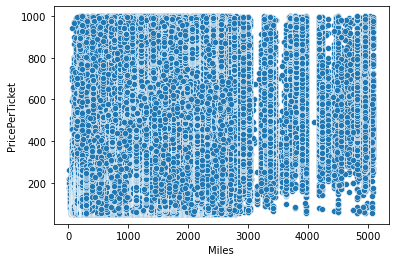

In [4]:
sns.scatterplot(data=df, x='Miles', y='PricePerTicket')

<AxesSubplot:xlabel='PricePerTicket', ylabel='Count'>

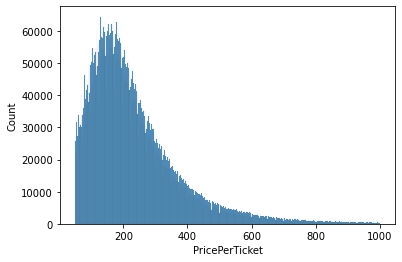

In [5]:
sns.histplot(data=df, x='PricePerTicket')

<AxesSubplot:xlabel='PricePerTicket', ylabel='Count'>

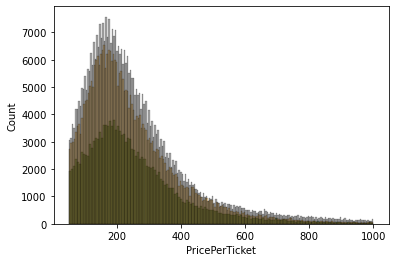

In [6]:
#plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['Origin']=='PHL'], x='PricePerTicket', color = 'green', alpha = 0.35, label = 'PHL')
sns.histplot(data=df[df['Origin']=='ORD'], x='PricePerTicket', color = 'orange', alpha = 0.35, label = 'ORD')
sns.histplot(data=df[df['Origin']=='LAX'], x='PricePerTicket', color = 'black', alpha = 0.35, label = 'LAX')
#plt.legend()

In [7]:
#not normal distr. positive skew
Q1 = df['PricePerTicket'].quantile(0.25)
Q3 = df['PricePerTicket'].quantile(0.75)
IQR = Q3 - Q1
IQR

156.09

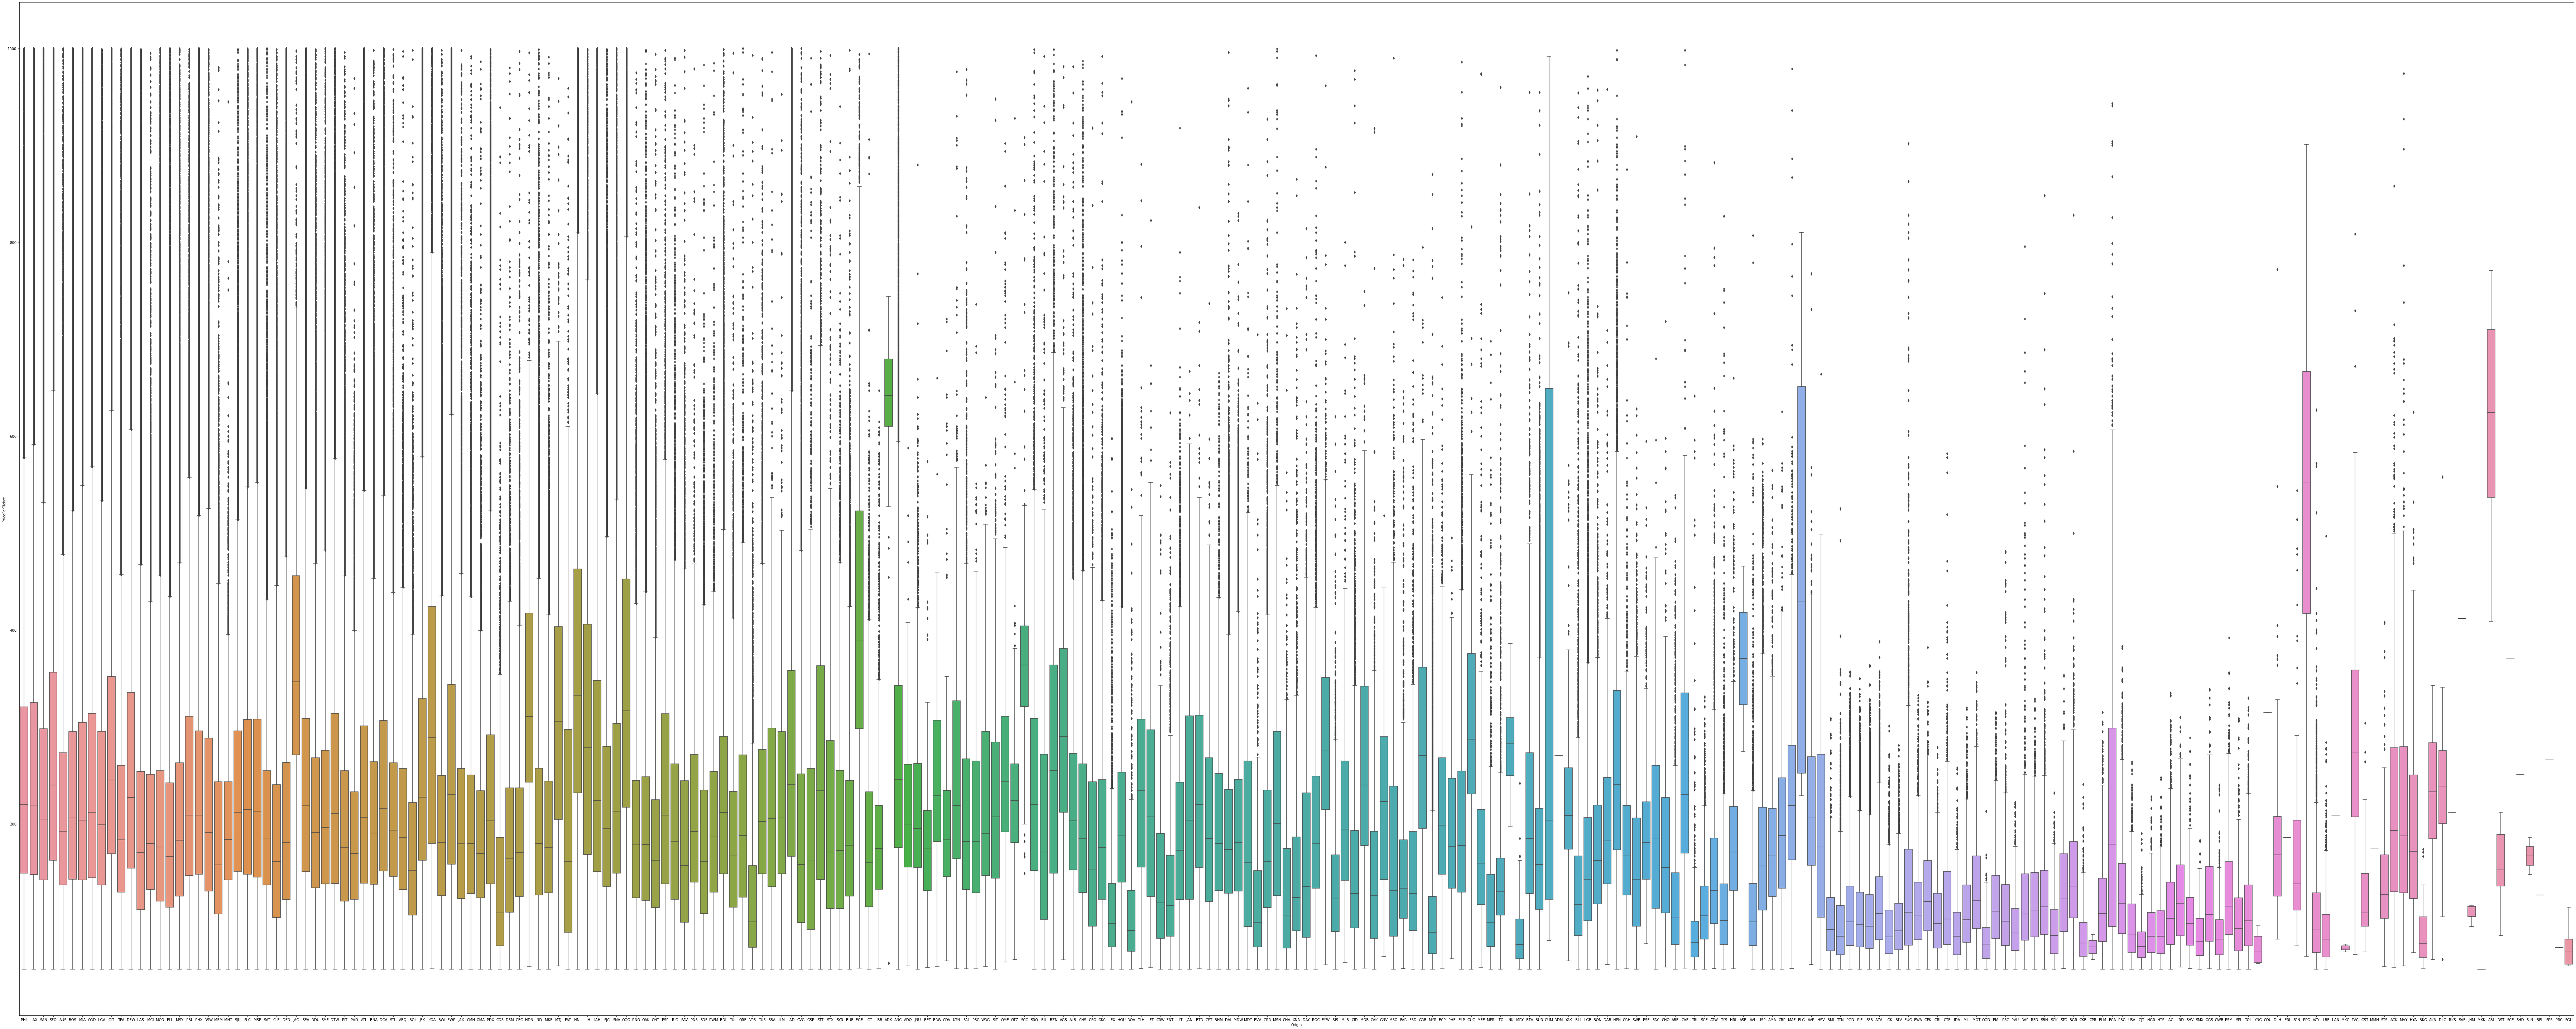

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 40))
ax = sns.boxplot(data=df, x='Origin', y='PricePerTicket')
plt.tight_layout()
plt.savefig('origin_box', dpi = 400, bbox_inches='tight')
#too much

<AxesSubplot:xlabel='Miles', ylabel='Count'>

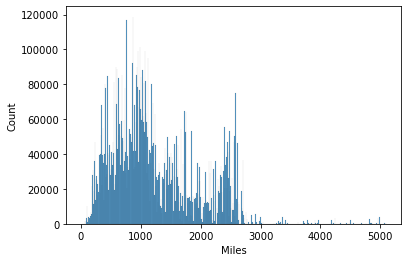

In [9]:
sns.histplot(data=df, x='Miles')

<AxesSubplot:xlabel='AirlineCompany', ylabel='PricePerTicket'>

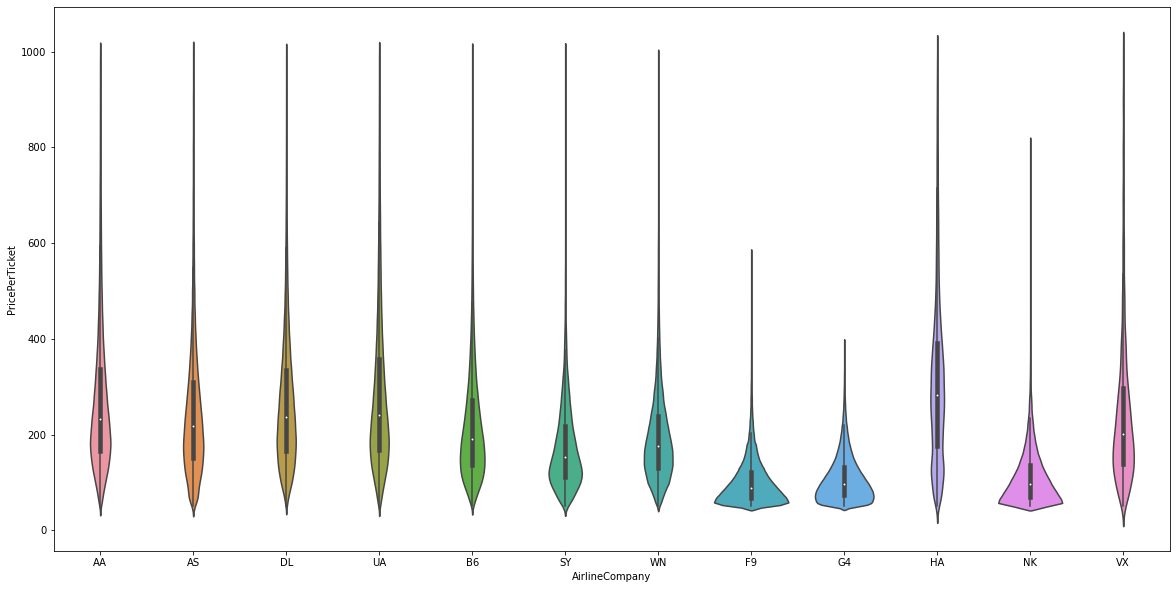

In [12]:
plt.figure(figsize=(20, 10))

sns.violinplot(x ="AirlineCompany", 
             y ="PricePerTicket", 
             data = df)

<AxesSubplot:xlabel='Quarter', ylabel='PricePerTicket'>

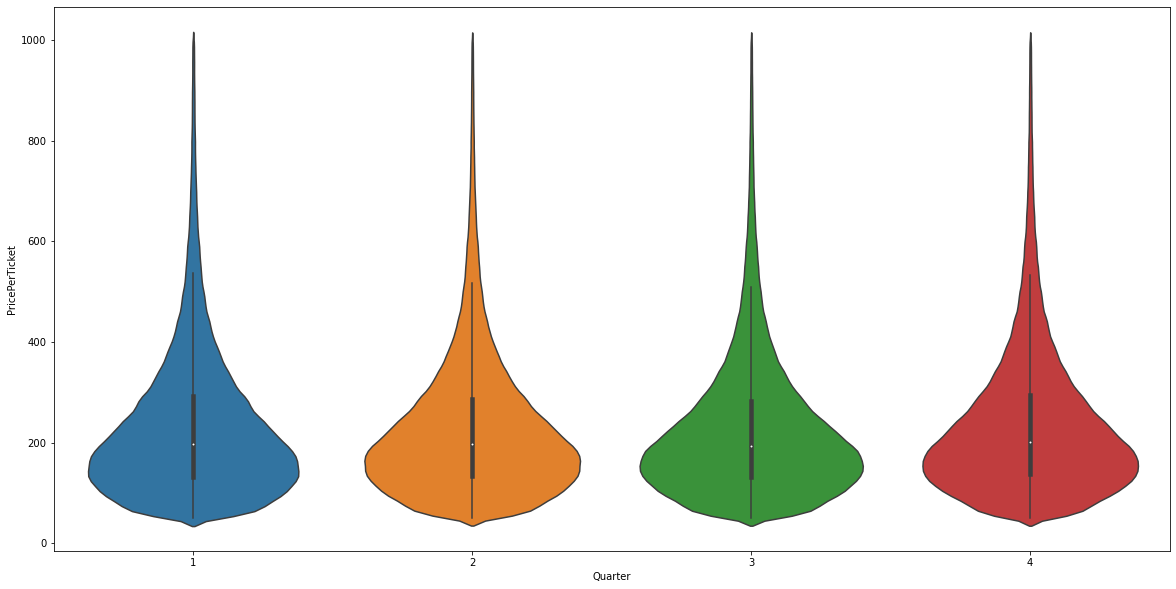

In [13]:
plt.figure(figsize=(20, 10))

sns.violinplot(x ="Quarter", 
             y ="PricePerTicket", 
             data = df)

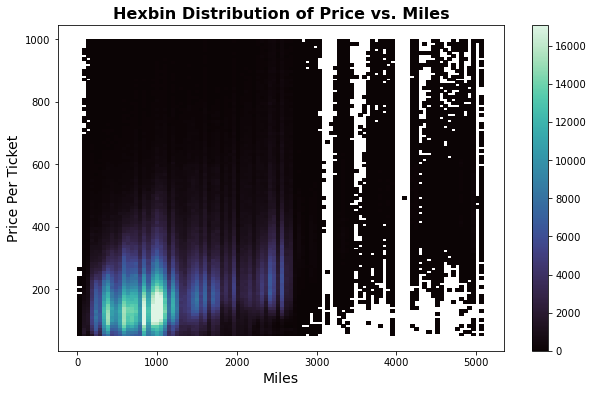

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Miles', y='PricePerTicket', bins=100, pmax=0.95, cmap='mako', cbar=True, vmin=0)
plt.title('Hexbin Distribution of Price vs. Miles', fontsize=16, fontweight='bold')
plt.xlabel('Miles', fontsize=14)
plt.ylabel('Price Per Ticket', fontsize=14)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'NumTicketsOrdered']]  # Add more features if available
y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

Mean Squared Error: 15735.217303100613


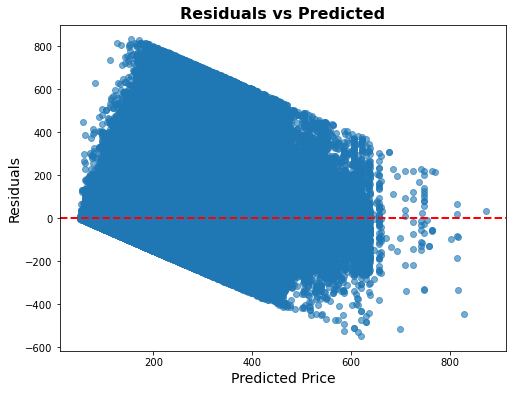

In [24]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

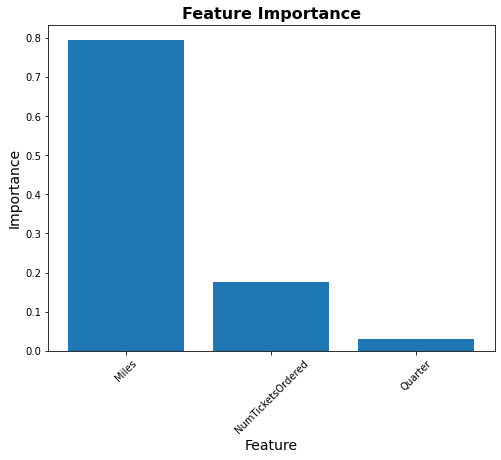

In [25]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [26]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Error', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Validation Error', marker='o')
plt.title('Learning Curve', fontsize=16, fontweight='bold')
plt.xlabel('Training Size', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.legend()
plt.show()

KeyboardInterrupt: 

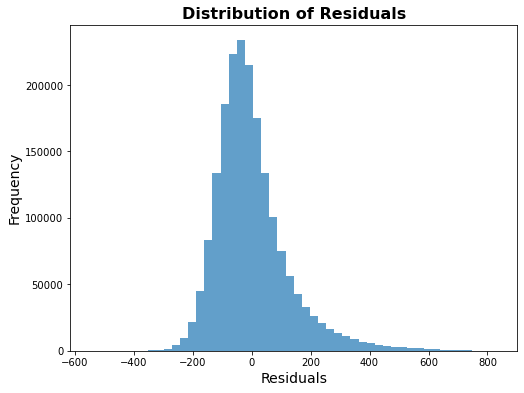

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder

X = df[['Miles', 'Quarter', 'NumTicketsOrdered', 'Origin']]  # Add more features if available
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-31-261028c6a6ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 15153.570127355155


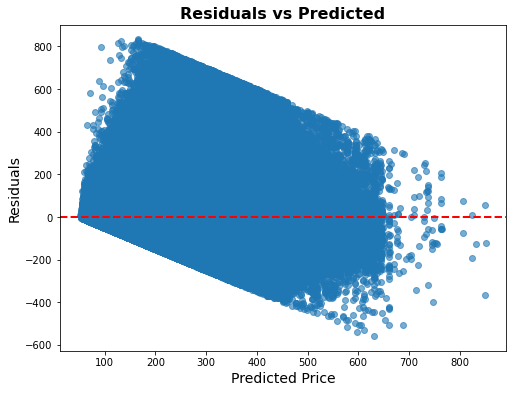

In [32]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

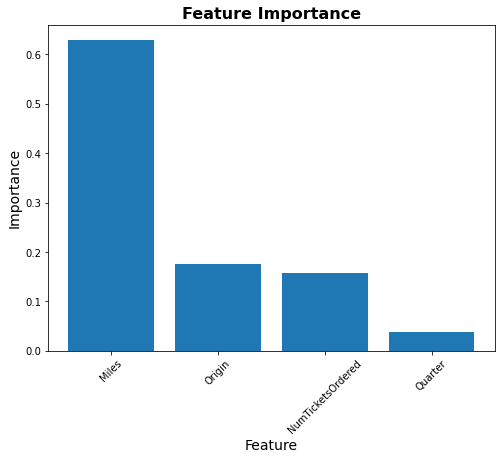

In [33]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

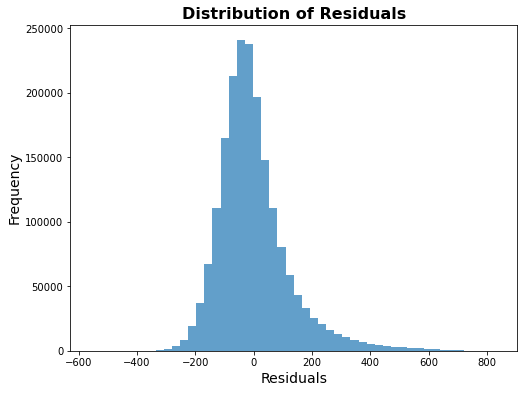

In [34]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'NumTicketsOrdered', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-37-60c3969d7207>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])


Mean Squared Error: 15152.545493981166


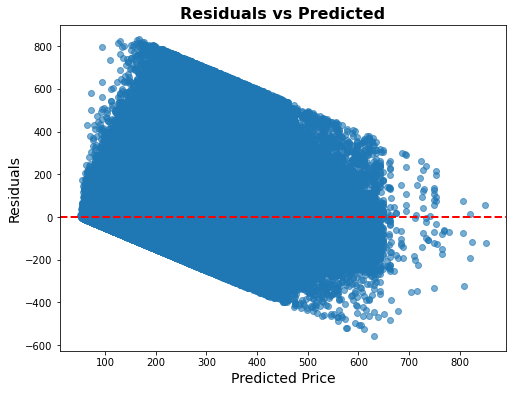

In [40]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

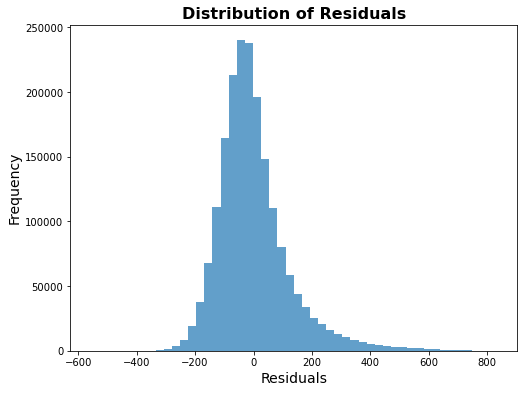

In [41]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'NumTicketsOrdered', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-43-d444646ae15c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-43-d444646ae15c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 15127.864385641571


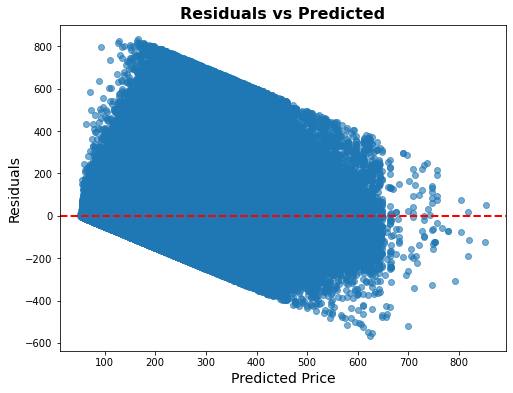

In [44]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

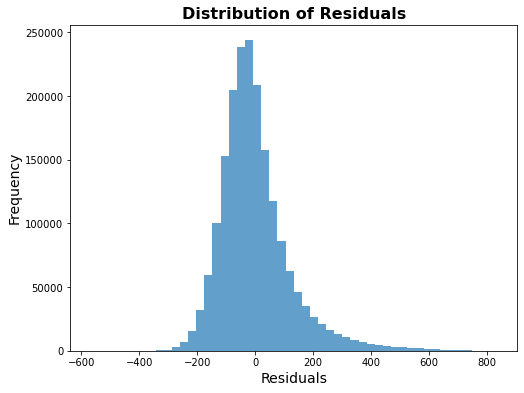

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

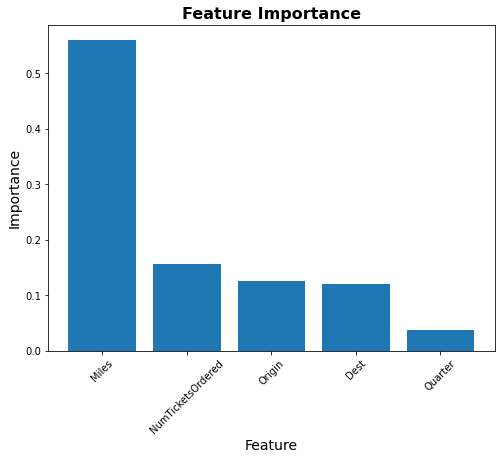

In [46]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'Origin', 'Dest']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-47-fc86da01e5d2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-47-fc86da01e5d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])


Mean Squared Error: 15748.165582794109


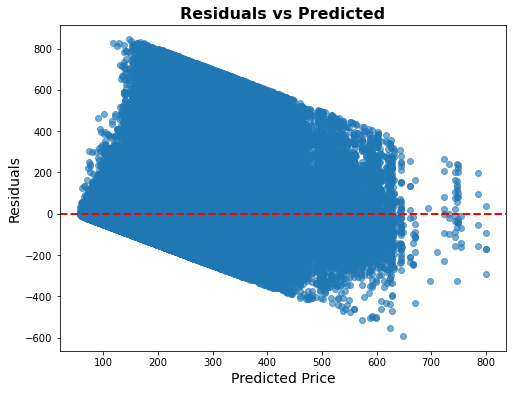

In [48]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

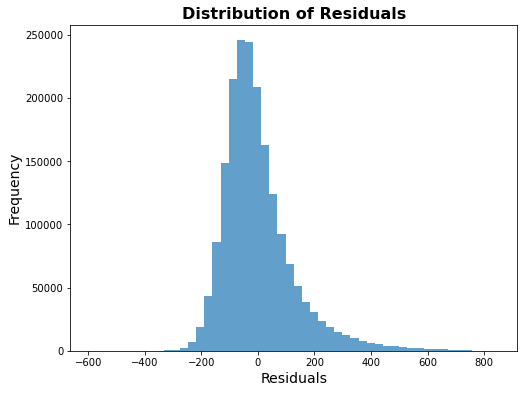

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

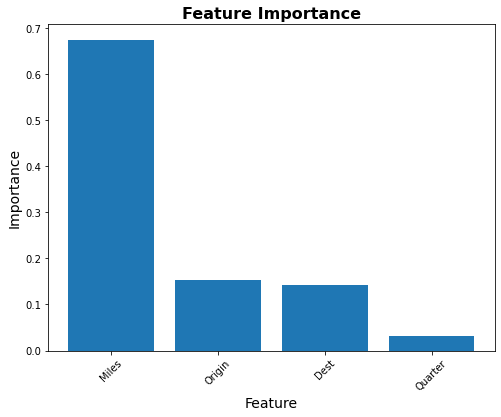

In [50]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-56-042617749bc4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-56-042617749bc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-56-042617749bc4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Mean Squared Error: 14439.19800942936


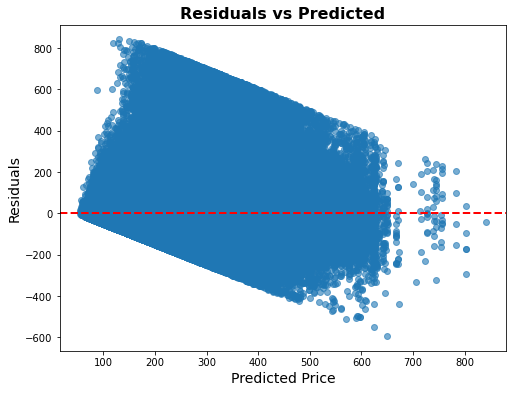

In [57]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

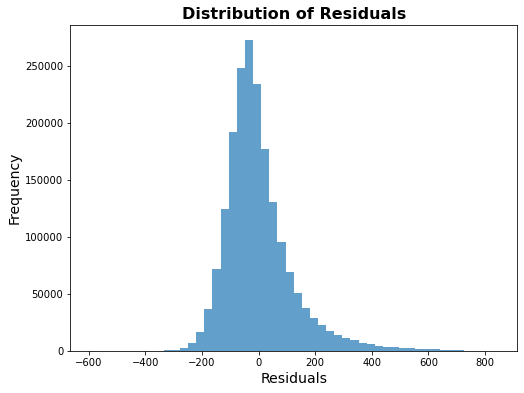

In [58]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

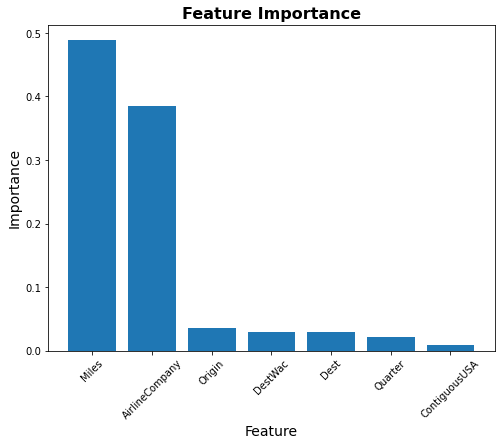

In [59]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Quarter', 'Origin', 'Dest', 'ContiguousUSA', 'DestWac', 'AirlineCompany', 'MktCoupons']]  # Add more features if available
X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-60-6c75ba5a45a5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Dest'] = OrdinalEncoder().fit_transform(X[['Dest']])
<ipython-input-60-6c75ba5a45a5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-60-6c75ba5a45a5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

Mean Squared Error: 14438.31201336323


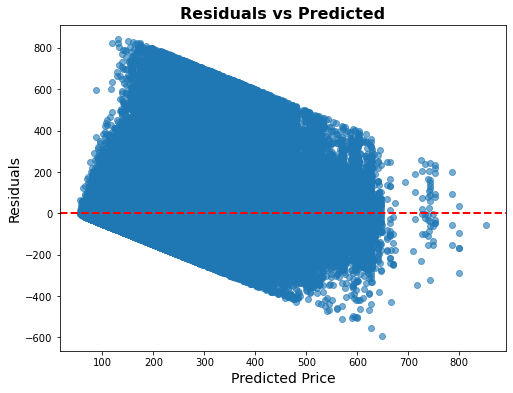

In [61]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

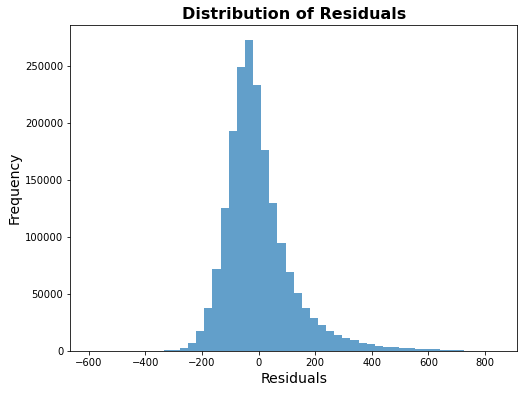

In [62]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

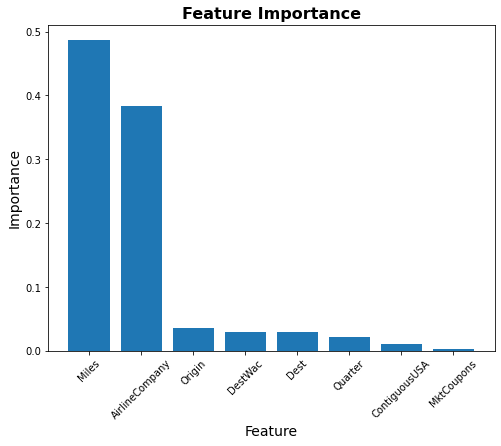

In [63]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'Origin', 'DestWac', 'AirlineCompany']]  # Add more features if available
X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-64-185622951b63>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = OrdinalEncoder().fit_transform(X[['Origin']])
<ipython-input-64-185622951b63>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


Mean Squared Error: 14540.624066746546


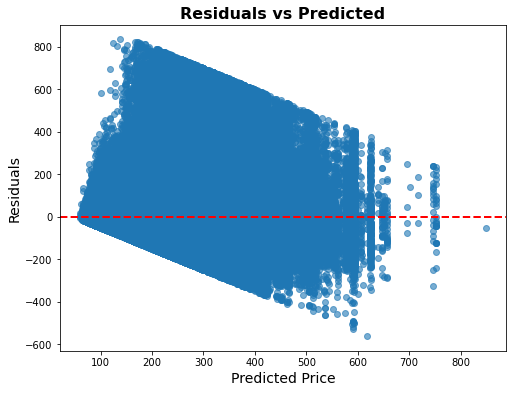

In [65]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

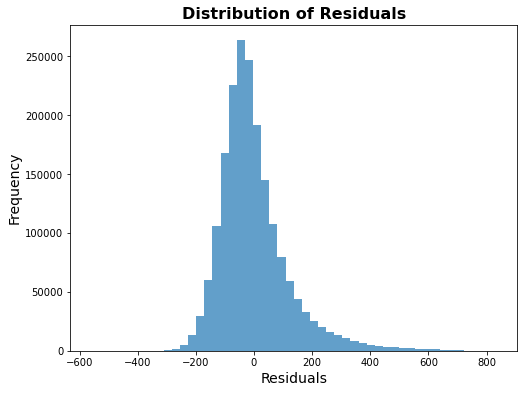

In [66]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

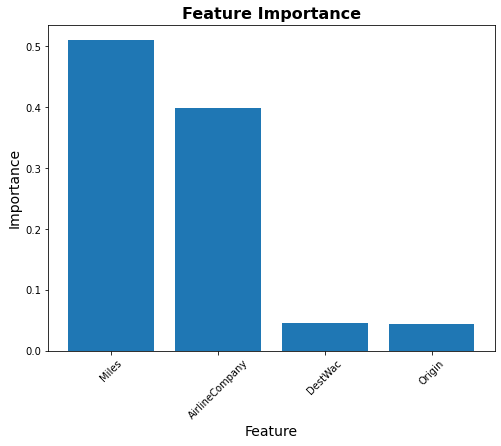

In [67]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X = df[['Miles', 'AirlineCompany']]  # Add more features if available

X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-68-a41ca2c9c272>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


Mean Squared Error: 14627.785563134967


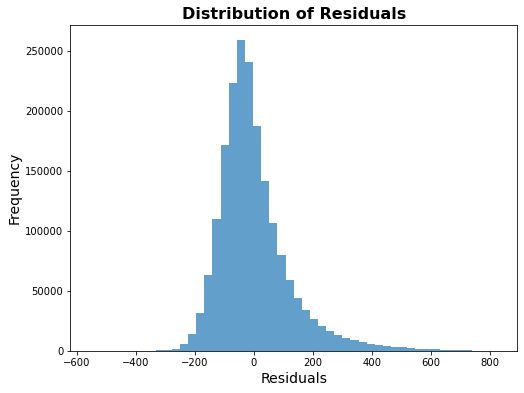

In [70]:
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.title('Distribution of Residuals', fontsize=16, fontweight='bold')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

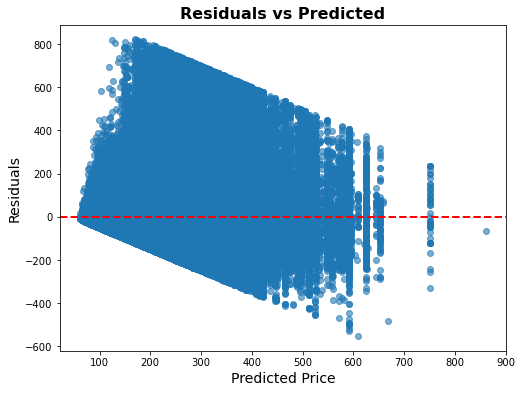

In [69]:
# Compute residuals
residuals = y_test - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

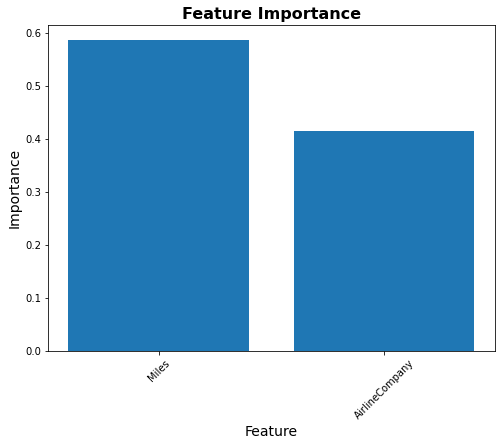

In [71]:
import pandas as pd
# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance', fontsize=16, fontweight='bold')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Importance', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder
from xgboost import XGBRegressor

# Feature selection and preprocessing
X = df[['Miles', 'AirlineCompany']]  # Add more features if available
X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])

y = df['PricePerTicket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

<ipython-input-74-a62158a02024>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AirlineCompany'] = OrdinalEncoder().fit_transform(X[['AirlineCompany']])


Mean Squared Error: 15616.943067694474


In [73]:
!pip install xgboost